In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

In [3]:
DATA_DIR = Path("/Users/sean/code/study-hard/power-systems-ops/data")
STUDY_DIR = DATA_DIR / "Multi-Stage_Aging_Study"
SAVE_DIR = DATA_DIR / "cleaned_study"

In [5]:
from battery_health.multi_aging_exp.load import Measurement

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import traceback

In [7]:
measurements = []
errors = []
for i, file in enumerate(STUDY_DIR.rglob("*.csv")):
    if i % 100 == 0:
        print(f"Parsing file {i}: {file.name}")
    if file.name == "experiments_meta.csv":
        # Everything else is a measurement file.
        continue
    try:
        measurements.append(Measurement(file))    
    except Exception as exc:
        print(f"Warning: exception {exc} loading {file.name}")
        traceback.print_exception(exc)
        errors.append((file, exc))

    # if i > 30:
    #     break

Parsing file 0: experiments_meta.csv
Parsing file 100: TP_k05_03_07_AT_T45.csv
Parsing file 200: TP_z21_03_33_AT_T23.csv
Parsing file 300: TP_z01_02_21_CU.csv
Parsing file 400: TP_z08_02_08_ZYK.csv
Parsing file 500: TP_z16_01_31_CU.csv
Parsing file 600: TP_k08_03_09_exCU.csv
Parsing file 700: TP_z10_01_01_ET_T23.csv
Parsing file 800: TP_k06_05_02_AT_T23.csv
Parsing file 900: TP_z22_03_10_ZYK.csv
Parsing file 1000: TP_z05_01_13_exCU.csv
Parsing file 1100: TP_z11_03_01_ET_T23.csv
Parsing file 1200: TP_z12_02_31_exCU.csv
Parsing file 1300: TP_z15_01_04_ZYK.csv
Parsing file 1400: TP_z12_03_16_ZYK.csv
Parsing file 1500: TP_k04_02_07_AT_T23.csv
Parsing file 1600: TP_z21_02_16_ZYK.csv
Parsing file 1700: TP_z14_03_05_CU.csv
Parsing file 1800: TP_k07_01_07_AT_T23.csv
Parsing file 1900: TP_z04_02_12_ZYK.csv
Parsing file 2000: TP_z11_02_11_CU.csv
Parsing file 2100: TP_k05_02_07_AT_T23.csv
Parsing file 2200: TP_z01_01_33_AT_T10.csv
Parsing file 2300: TP_z16_02_17_CU.csv
Parsing file 2400: TP_z03_0

In [ ]:
Clarence4530

In [18]:
from power_systems_ops.battery.data_import import set_grouped_attributes

In [19]:
set_grouped_attributes(measurements)

In [20]:
import pandas as pd

In [163]:
def save(measurements):
    df = pd.DataFrame([measurement.row for measurement in measurements])
    df = df.sort_values(by=['experiment_id', "number"]).reset_index(drop=True)
    df.to_csv(SAVE_DIR / "measurements.csv")

In [164]:
save(measurements)

In [18]:
dt.days * 3600 * 24 + dt.seconds

864020

In [17]:
dt.total_seconds()

864020.0

In [26]:
print(len(measurements))

5774


# Searching for misformed calendar times

In [39]:
from dataclasses import dataclass

In [67]:
@dataclass
class Experiment:
    type_: str
    number: int
    cell: int

    @classmethod
    def from_str(cls, exp_str):
        return parse_experiment(exp_str)
    
def parse_experiment(exp_str):
    # Example experiment string: TP_z14_03
    words = exp_str.split("_")
    assert len(words) == 3
    type_ = words[1][0]
    number = int(words[1][1:])
    cell = int(words[2])
    return Experiment(type_, number, cell)

In [75]:
def find_(measurements, *, type_, experiment_number, stage, measurement_number, cell, measurement_type=None):
    for m in measurements:
        e = Experiment.from_str(m.experiment)
        if (e.number == experiment_number and e.cell == cell
                and e.type_ == type_
                and m.stage == stage and m.number == measurement_number
                and (measurement_type is None or m.type == measurement_type)):
            return m
    raise KeyError
            

In [154]:
from power_systems_ops.battery.data_import import Measurement

In [159]:
m = find_(measurements, type_="z", experiment_number=2, stage=2, measurement_number=9, cell=2)
print(m.experiment_id)

yoooo 2
TP_z02_02_2


In [28]:
for m in measurements:
    print(m.calendar_time)

6651397.66
21166557.343
436507.282
12094608.519
30757046.172
16321128.35
4146064.79
956817.14
34990973.604
0.0
35601055.023
26084142.09
35253745.67
501900.025
36887117.225
37244962.84
1189386.95
0.0
36628405.567
4305255.765
0.0
3009255.765
nan
849255.766
5601255.765
6824772.812
4161409.577
414681.641
2176850.521
7085155.815
2231655.765
1540455.765
nan
5531846.375
1468360.225
2866330.831
919017.845
917847.396
39364485.552
39031577.451
413711.348
38793950.691
0.0
0.0
36630192.012
37244810.096
1189429.487
501972.25
36886953.983
23210413.653
0.0
16644013.653
7658413.653
31089789.665
26320813.653
8363163.54
31348849.296
6880813.653
13620013.654
16140598.977
28839942.201
10077613.653
30568473.262
9918362.932
19595151.742
8436013.654
20359213.653
7585558.987
332362.926
26247943.057
22878341.261
591550.583
13028755.669
11387152.701
6548784.449
28999213.654
11460013.653
5844013.653
33779595.785
0.0
13987632.912
33432979.349
6648773.678
692904.53
4229588.437
23581723.217
28335131.867
10191288.12

# Some Sanity Check Visualizations 

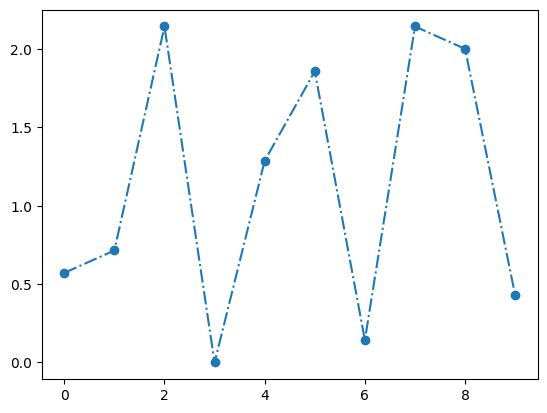

In [66]:
plt.plot([d.days / 7 for d in diffs], '-.o')

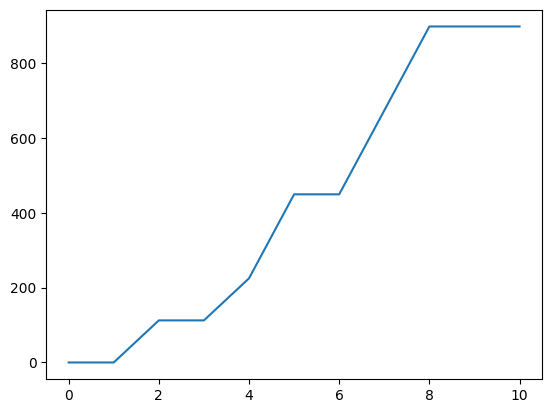

In [45]:
plt.plot([c.cum_fec for c in checkup_group])

(array([4., 0., 0., 0., 1., 1., 1., 2., 2., 1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

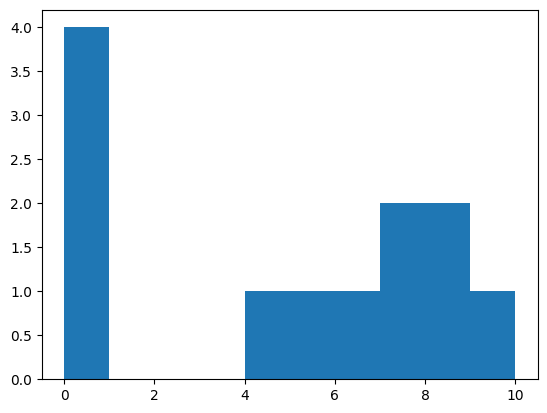

In [109]:
plt.hist([d.days / 7 for d in diffs], bins=np.linspace(0, 10, 11))

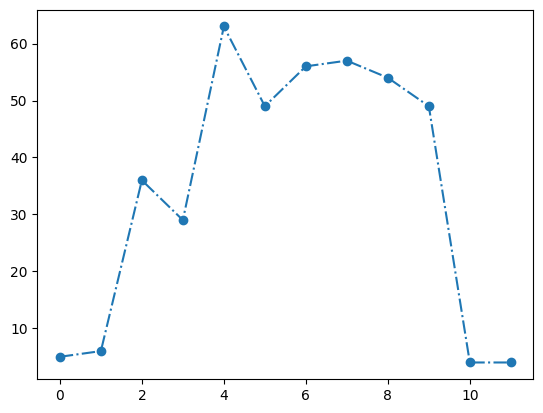

In [78]:
plt.plot(np.diff([t.days for t in true_time]), "-.o")

# Add an ID to experiments_meta.csv

In [77]:
experiments = pd.read_csv(STUDY_DIR / "experiments_meta.csv")
experiments['id'] = experiments['serial'] + "_" + experiments['stage'].astype(str)
experiments.to_csv(STUDY_DIR / "experiments_meta_new.csv")

# Error Display

In [ ]:
from itertools import islice

In [86]:
# Backup before modifying checkups variable
# checkups_full = checkups

In [106]:
def bold(text):
    return f"\033[1m{text}\033[0m"

In [122]:

def chunked(iterable, size):
    it = iter(iterable)
    while chunk := list(islice(it, size)):
        yield chunk

In [137]:
from power_systems_ops.battery.data_import import SensorDataNotFound

In [140]:
for file, exc in errors:
    if not isinstance(exc, SensorDataNotFound):
        print(file.name, exc)

measurements.csv No stage in path!


In [134]:
print(bold("Sensor Data Missing"))
print("-" * 100)
err_files = [f for f, _ in errors[1:]]
err_files.sort(key=lambda f: f.name)
for files in chunked(err_files, 3):
    print(" | ".join([f"Stage_{infer_stage(file)}/{file.name:20s}" for file in files]))

Sensor Data Missing
----------------------------------------------------------------------------------------------------
Stage_2/TP_z15_01_22_AT_T10.csv | Stage_2/TP_z15_01_22_AT_T45.csv | Stage_2/TP_z15_02_24_AT_T10.csv
Stage_2/TP_z15_02_24_AT_T45.csv | Stage_2/TP_z15_03_24_AT_T10.csv | Stage_2/TP_z15_03_24_AT_T45.csv
Stage_2/TP_z17_01_24_AT_T10.csv | Stage_2/TP_z17_01_24_AT_T45.csv | Stage_2/TP_z17_02_24_AT_T10.csv
Stage_2/TP_z17_02_24_AT_T45.csv | Stage_2/TP_z17_03_24_AT_T10.csv | Stage_2/TP_z17_03_24_AT_T45.csv
Stage_2/TP_z20_01_14_AT_T10.csv | Stage_2/TP_z20_01_14_AT_T45.csv | Stage_2/TP_z20_02_08_AT_T10.csv
Stage_2/TP_z20_02_08_AT_T45.csv | Stage_2/TP_z20_03_14_AT_T10.csv | Stage_2/TP_z20_03_14_AT_T45.csv
Stage_2/TP_z23_01_08_AT_T10.csv | Stage_2/TP_z23_01_08_AT_T45.csv | Stage_2/TP_z23_02_10_AT_T10.csv
Stage_2/TP_z23_02_10_AT_T45.csv | Stage_2/TP_z23_03_14_AT_T10.csv | Stage_2/TP_z23_03_14_AT_T45.csv


In [87]:
# filter out any errors that occur while trying to access the time...
# But we won't need this after we add support for Null times...
checkups_okay = []
time_errors = []
for c in checkups:
    try:
        c.time
        checkups_okay.append(c)
    except Exception:
        time_errors.append(c)

In [116]:
print(bold("Improperly Formatted Dates"))
print("-" * 50)
title = "filename"
print(f"{title:22s}| Measurement start date")
print("-" * 50)
for c in time_errors:
    print(f"{c.file.name:22s}| {c.meta.get("Measurement start date")}")


Improperly Formatted Dates
--------------------------------------------------
filename              | Measurement start date
--------------------------------------------------
TP_z01_02_20_ZYK.csv  | 13.17.2023
TP_z01_02_06_ZYK.csv  | 29.02.2023
TP_z02_02_06_ZYK.csv  | 29.02.2023
TP_z02_02_09_CU.csv   | None
TP_z19_01_31_CU.csv   | 22.10.222.12.233
TP_z03_01_06_ZYK.csv  | 29.02.2023
TP_z03_03_06_ZYK.csv  | 29.02.2023
TP_z01_01_06_ZYK.csv  | 29.02.2023
TP_z02_01_06_ZYK.csv  | 29.02.2023
TP_z03_02_06_ZYK.csv  | 29.02.2023
TP_z02_03_06_ZYK.csv  | 29.02.2023
TP_z01_03_20_ZYK.csv  | 13.17.2023
TP_z01_03_06_ZYK.csv  | 29.02.2023
TP_z12_03_07_exCU.csv | xx.12.2021


In [91]:
# Remove time errors
checkups = checkups_okay